## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

model = build_mlp()

In [6]:
"""
Compile 模型

設定要訓練的 Epoch 數
"""

optimizer = keras.optimizers.sgd(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.fit(x_train, y_train, 
          epochs=10, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 124us/step - loss: 2.1458 - accuracy: 0.2345 - val_loss: 2.1200 - val_accuracy: 0.2534
Epoch 2/10
50000/50000 [==============================] - 5s 106us/step - loss: 2.0971 - accuracy: 0.2597 - val_loss: 2.0730 - val_accuracy: 0.2696
Epoch 3/10
50000/50000 [==============================] - 12s 240us/step - loss: 2.0533 - accuracy: 0.2773 - val_loss: 2.0325 - val_accuracy: 0.2877
Epoch 4/10
50000/50000 [==============================] - 7s 133us/step - loss: 2.0167 - accuracy: 0.2942 - val_loss: 1.9990 - val_accuracy: 0.2994
Epoch 5/10
50000/50000 [==============================] - 12s 247us/step - loss: 1.9856 - accuracy: 0.3047 - val_loss: 1.9703 - val_accuracy: 0.3090
Epoch 6/10
50000/50000 [==============================] - 15s 309us/step - loss: 1.9593 - accuracy: 0.3127 - val_loss: 1.9476 - val_accuracy: 0.3201
Epoch 7/10
50000/50000 [==============================] - 1

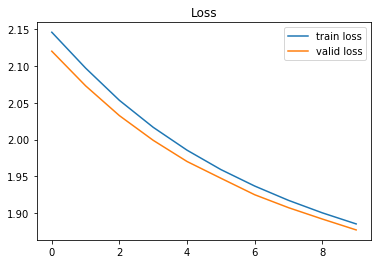

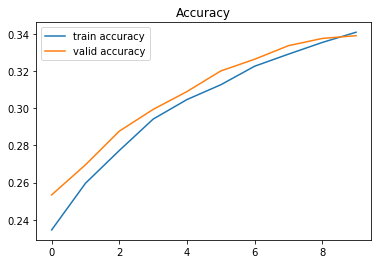

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()